#**K-Means: Wine Quality**


####The objective of this project is to cluster wines based on their pH and alcohol concentration in order to identify groups of wines that have similar properties. The goal is to explore whether these variables can be used to predict wine quality and to identify any patterns or relationships between them. This will involve applying a K-Means/Clustering algorithm to the data and analyzing the resulting clusters. The project aims to provide insights into the factors that contribute to wine quality and to identify potential areas for further research.

####For this analysis we will be using the following libraries: *pandas, scikit-learn, numPy, and matplotlib*

In [197]:
# Importing libraries for the Clustering/K-means ML model 

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
%matplotlib inline

#**Data Set**:
####The dataset used is from Kaggle, and it is a combined version of two separate files: one for red wine samples and one for white wine samples, originally shared in the UCI Machine Learning Repository.
 
####The data was collected by P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis for their research on modeling wine preferences by data mining from physicochemical properties.


####**Variables**: image.png





```
# This is formatted as code
```

#**Exploratory Data Analysis & Pre-processing:**

In [198]:
# Loading the data from a CSV file and display the first 5 rows of the dataset

wq_df = pd.read_csv("wine_quality.csv")
wq_df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [199]:
# Dropping the categorical feature 'type'

df = wq_df.drop('type', axis=1)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [200]:
# Row and columns

df.shape

(6497, 12)

In [201]:
# Getting basic stats on the dataset

df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [202]:
# Number of instances for each rating (0-10)

df.groupby("quality").size()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

In [203]:
# Checking  if there are missing values 

df.isnull().any().any()

False

In [204]:
# Normalizing the data 

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.42318303,  0.28468605,  3.20692903, ..., -0.54617826,
        -1.41855821,  0.20799905],
       [-0.24094936,  0.14704613, -0.80783726, ..., -0.27735097,
        -0.83161516,  0.20799905],
       [-0.36243847,  0.55996589,  0.30620784, ..., -0.61338508,
        -0.32852111,  0.20799905],
       ...,
       [ 1.03468634, -1.29817304, -0.66069923, ...,  1.47002637,
         0.42611996,  0.20799905],
       [ 1.85473786, -1.366993  , -0.72375839, ...,  1.20119908,
        -0.2446721 , -0.93722961],
       [-0.1802048 ,  1.04170561, -0.38744289, ...,  0.86516498,
         0.42611996,  0.20799905]])

#Setting up k-means


#####For our project, we'll be using three specific settings in the KMeans class:

1.   `init`: This sets how the algorithm will pick the starting positions for the clusters. We'll use "k-means++", which is a smart way to speed up the clustering process.
2.  `n_clusters`: This sets how many clusters we want to form. Since we have three centers, we'll set this to 3.
3.   `n_init`: This sets how many times the algorithm will run with different starting positions for the clusters. We'll set this to 10 to get the best possible results.

We'll use these settings to initialize KMeans, and the output will be called `k_means`.

In [205]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10)

Fitting the KMeans model with the feature matrix we created above, <b> X




In [206]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=10)

Grabbing the labels for each point in the model using KMeans' <b> `.labels\_ `</b> attribute and saving it as <b> `labels` </b>.

#####In clustering, after fitting the model to the data, the clusters are assigned to each data point based on their proximity to the centroids. The <b>`k_means.labels_`</b> attribute returns an array of cluster labels that indicate which cluster each data point belongs to.

#####By assigning these labels to a new column in the dataframe <b>`df["Clus_km"] = labels`</b>, we can easily visualize the clustering results and analyze the characteristics of each cluster. 

In [207]:
labels = k_means.labels_
print(labels)

[1 2 2 ... 0 0 0]


#####In this code, <b>`df["Clus_km"] = labels`</b> assigns the cluster labels generated by the KMeans algorithm to a new column called <b>"Clus_km"</b> in the DataFrame `df`. 
#####The `labels` variable contains the predicted cluster labels for each data point in `df`. 


In [208]:
df["Clus_km"] = labels
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Clus_km
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


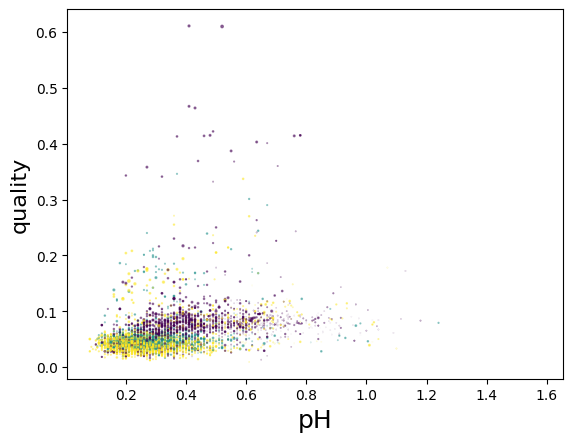

In [209]:
# Plotting 2 of the most important features quality and pH

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('pH', fontsize=18)
plt.ylabel('quality', fontsize=16)

plt.show()

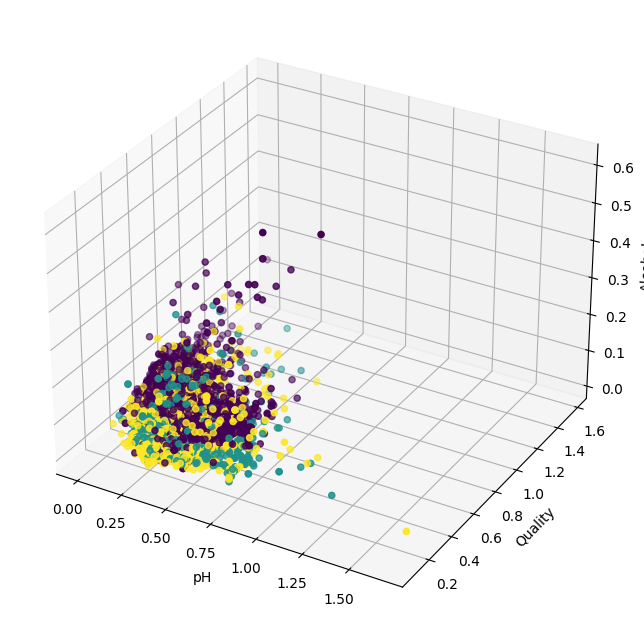

In [210]:
# Selecting 3 most important features for a 3D plot

from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(10, 8))
plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax = plt.subplot(111, projection="3d")

plt.cla()
# plt.ylabel('pH', fontsize=18)
# plt.xlabel('quality', fontsize=16)
# plt.zlabel('alcohol', fontsize=16)
ax.set_xlabel('pH')
ax.set_ylabel('Quality')
ax.set_zlabel('Alcohol')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float64))

#Evaluating ML Model

#####Clustering validation metrics: 

1.  **Silhouette score**: Measures how similar a data point is to its own cluster compared to other clusters. Ranges from -1 to 1, with higher scores indicating better clustering.
2.   **Calinski-Harabasz score**: Compares the between-cluster dispersion to the within-cluster dispersion. Higher scores indicate better-defined clusters.
3. **Davies-Bouldin score**: Measures the average similarity between each cluster and its most similar cluster. Lower scores indicate better clustering.

In [211]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels, metric='euclidean')

0.5044279756690587

In [212]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, labels)

13982.17465885412

In [213]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

0.6406956457239321